<a href="https://colab.research.google.com/github/data2450/california-house-price-prediction/blob/main/first_Liner_regression_on_claifornia_housing_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test_d=pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
df=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [ ]:
test_d.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


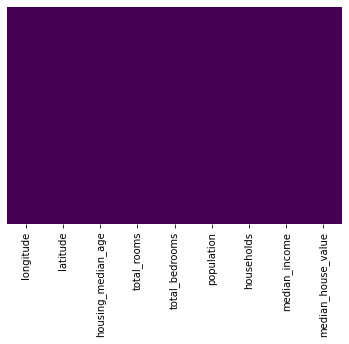

In [ ]:
##lets check missing data 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#no misiing values

In [ ]:
#ALL the features are continuos values
sns.pairplot(df,diag_kind='kde')
#we can see some strong and weak relationship between the features and target 


#lets take median_house_value as the target value

In [ ]:
coor=df.corr()

In [ ]:
coor

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [ ]:
df.shape

(17000, 9)

In [ ]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
mask = np.zeros_like(coor)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(coor, mask=mask, vmax=1, square=True)
 #we can examine strong coorelation within the features    

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#lets check for outliers in the column 
plt.hist(df['median_income'],bins=15)


In [ ]:
df['median_income'].value_counts()

In [ ]:
plt.hist(df['households'],bins=15)

In [ ]:
df['households'].value_counts()

In [ ]:
for feature in df:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# lets find the model without any preprocessing

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge

In [ ]:
X_train=df.drop('median_house_value',axis=1)
y_train=df['median_house_value']

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-5326336374.988355


In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
-5347355980.50747


In [ ]:
#feature_sel_model = SelectFromModel(Lasso(alpha=20, random_state=0)) # remember to set the seed, the random state in this function
#feature_sel_model.fit(X_train, y_train)

In [ ]:
#feature_sel_model1 = SelectFromModel(Ridge(alpha=100, random_state=0)) # remember to set the seed, the random state in this function
#feature_sel_model1.fit(X_train, y_train)

In [ ]:
feature_sel_model1.get_support()

In [ ]:
feature_sel_model1.get_support()

In [ ]:
test_d.shape
print(df.shape)


In [ ]:
y_train=df['median_house_value']

In [ ]:
df['median_house_value']

In [ ]:
X_train=df.drop('median_house_value',axis=1)

In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [ ]:
y_test=test_d['median_house_value']

In [ ]:
X_test=test_d.drop('median_house_value',axis=1)

In [ ]:
X_test.head()

# lets fit the model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
print('linear model coeff (w): {}'
     .format(regressor.coef_))

print('R-squared score (training): {:.3f}'
     .format(regressor.score(X_train, y_train),cv=10))
print( 'linear model intercept (b): {}'.format(regressor.intercept_))
print('R-squared score (test): {:.3f}'
     .format(regressor.score(X_test, y_test),cv=10))

linear model coeff (w): [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04]
R-squared score (training): 0.641
linear model intercept (b): -3620600.8929739078
R-squared score (test): 0.620


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
lg=ridge_regressor.fit(X_train,y_train)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-5326336374.988355


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

reg = linear_model.Ridge(alpha=100)
lg=reg.fit(X_train,y_train)

print('california_house_price')
print('ridge regression linear model intercept: {}'
     .format(lg.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(lg.coef_))
print('R-squared score (training): {:.3f}'
     .format(lg.score(X_train, y_train),cv=20))
print('R-squared score (test): {:.3f}'
     .format(lg.score(X_test, y_test),cv=20))
print('Number of non-zero features: {}'
     .format(np.sum(lg.coef_ != 0)))

california_house_price
ridge regression linear model intercept: -3539556.1512416485
ridge regression linear model coeff:
[-4.21917023e+04 -4.20403460e+04  1.16609440e+03 -8.46308354e+00
  1.16282639e+02 -3.85160226e+01  4.76451058e+01  4.05598233e+04]
R-squared score (training): 0.641
R-squared score (test): 0.620
Number of non-zero features: 8


# lets do some feature engneering

# Numerical varibles
**since the numerical features are skewed we will perform log normal distribution**

In [ ]:
df.columns
df1=['latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [ ]:
for feature in df1:
    df[feature]=np.log(df[feature])

In [ ]:
data=df[df1]

In [ ]:
data.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler=StandardScaler()

In [ ]:
std_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#fit and transform the data
df_std=pd.DataFrame(std_scaler.fit_transform(data),columns=(data).columns)

In [ ]:
df_std.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105
3,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600
4,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454


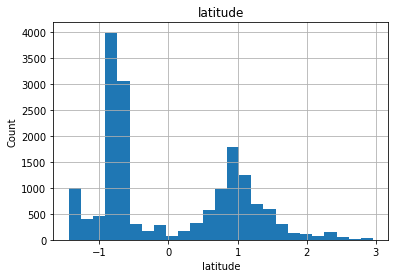

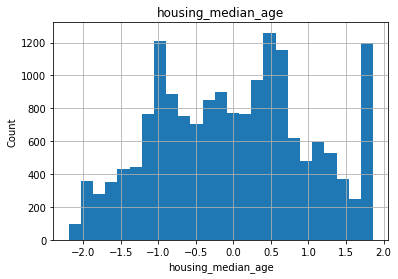

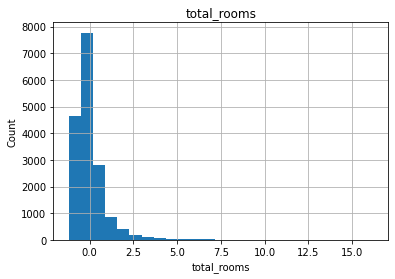

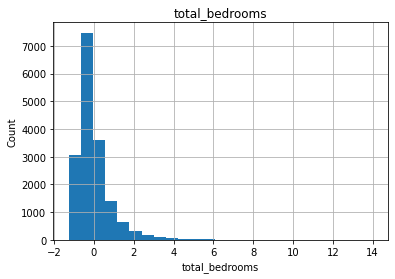

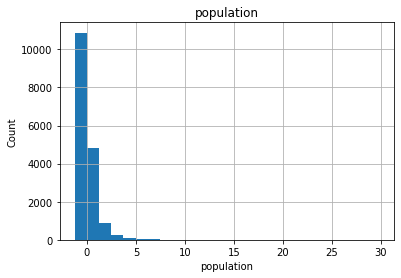

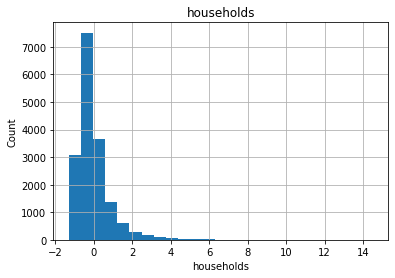

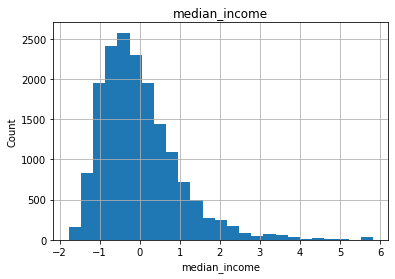

In [ ]:
for feature in df_std:
    data=df_std.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [ ]:
#for feature in df1:
    #df[feature]=np.log(df[feature])

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,3.531933,2.708050,8.632662,7.156956,6.922644,6.156979,0.401189,66900.0
1,-114.47,3.538057,2.944439,8.942461,7.550135,7.029088,6.137727,0.598837,80100.0
2,-114.56,3.517201,2.833213,6.579251,5.159055,5.808142,4.762174,0.501321,85700.0
3,-114.57,3.515716,2.639057,7.313887,5.820083,6.244167,5.420535,1.160554,73400.0
4,-114.57,3.513633,2.995732,7.282074,5.786897,6.436150,5.568345,0.654926,65500.0


In [ ]:
df=df.drop('longitude',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            17000 non-null  float64
 1   housing_median_age  17000 non-null  float64
 2   total_rooms         17000 non-null  float64
 3   total_bedrooms      17000 non-null  float64
 4   population          17000 non-null  float64
 5   households          17000 non-null  float64
 6   median_income       17000 non-null  float64
 7   median_house_value  17000 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [ ]:
df.head()


,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,3.531933,2.708050,8.632662,7.156956,6.922644,6.156979,0.401189,11.110954
1,3.538057,2.944439,8.942461,7.550135,7.029088,6.137727,0.598837,11.291031
2,3.517201,2.833213,6.579251,5.159055,5.808142,4.762174,0.501321,11.358608
3,3.515716,2.639057,7.313887,5.820083,6.244167,5.420535,1.160554,11.203679
4,3.513633,2.995732,7.282074,5.786897,6.436150,5.568345,0.654926,11.089805


In [ ]:
X_train=df.copy()

In [ ]:
y_train=df['median_house_value']

In [ ]:
y_train.head()

0    11.110954
1    11.291031
2    11.358608
3    11.203679
4    11.089805
Name: median_house_value, dtype: float64

In [ ]:
X_train=X_train.drop('median_house_value',axis=1)

In [ ]:
X_train.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,3.531933,2.708050,8.632662,7.156956,6.922644,6.156979,0.401189
1,3.538057,2.944439,8.942461,7.550135,7.029088,6.137727,0.598837
2,3.517201,2.833213,6.579251,5.159055,5.808142,4.762174,0.501321
3,3.515716,2.639057,7.313887,5.820083,6.244167,5.420535,1.160554
4,3.513633,2.995732,7.282074,5.786897,6.436150,5.568345,0.654926


In [ ]:
for feature in df1:
    test_d[feature]=np.log(test_d[feature])

In [ ]:
test_d.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,3.620868,3.295837,8.264878,6.493754,7.337588,6.406880,1.888357,12.750430
1,-118.30,3.533978,3.761200,7.319865,5.736572,6.695799,5.624018,1.280656,12.081076
2,-117.81,3.519869,3.295837,8.185629,6.228511,7.302496,6.204558,1.756719,12.508027
3,-118.36,3.521052,3.332205,4.204693,2.708050,3.891820,2.397895,1.814157,12.706848
4,-119.67,3.592644,2.944439,7.123673,5.497168,6.745236,5.468060,1.077559,11.310809


In [ ]:
X_test=test_d.drop('longitude',axis=1)

In [ ]:
y_test=X_test['median_house_value']

In [ ]:
X_test=X_test.drop('median_house_value',axis=1)

In [ ]:
X_test.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,3.620868,3.295837,8.264878,6.493754,7.337588,6.406880,1.888357
1,3.533978,3.761200,7.319865,5.736572,6.695799,5.624018,1.280656
2,3.519869,3.295837,8.185629,6.228511,7.302496,6.204558,1.756719
3,3.521052,3.332205,4.204693,2.708050,3.891820,2.397895,1.814157
4,3.592644,2.944439,7.123673,5.497168,6.745236,5.468060,1.077559


In [ ]:
X_test=X_test[selected_feat]

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
feature_sel_model.get_support()

array([False,  True,  True,  True,  True,  True,  True])

In [ ]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]


In [ ]:
selected_feat

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income'],
      dtype='object')

In [ ]:
X_train=X_train[selected_feat]

In [ ]:
X_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.708050,8.632662,7.156956,6.922644,6.156979,0.401189
1,2.944439,8.942461,7.550135,7.029088,6.137727,0.598837
2,2.833213,6.579251,5.159055,5.808142,4.762174,0.501321
3,2.639057,7.313887,5.820083,6.244167,5.420535,1.160554
4,2.995732,7.282074,5.786897,6.436150,5.568345,0.654926


In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
print('linear model coeff (w): {}'
     .format(regressor.coef_))

print('R-squared score (training): {:.3f}'
     .format(regressor.score(X_train, y_train)))
print( 'linear model intercept (b): {}'.format(regressor.intercept_))
print('R-squared score (training): {:.3f}'
     .format(regressor.score(X_test, y_test)))

linear model coeff (w): [ 0.14527097 -0.74552395  0.67814545 -0.37239314  0.4727718   1.11429486]
R-squared score (training): 0.579
linear model intercept (b): 11.600127584270448
R-squared score (training): 0.531
